# Acquire

In [1]:
import Acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing

In [2]:
df = Acquire.get_mvp_home_data()

In [3]:
df = df.drop('id',axis=1)

In [4]:
df = df.dropna(how='any',axis=0) 

In [5]:
df.isnull().sum()

calculatedfinishedsquarefeet    0
bedroomcnt                      0
bathroomcnt                     0
taxvaluedollarcnt               0
dtype: int64

In [6]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
0,1819.0,3.0,2.0,478430.0
1,1000.0,0.0,0.0,27400.0
2,1503.0,2.0,2.0,171687.0
3,1604.0,4.0,2.0,498347.0
4,2384.0,3.0,3.0,549917.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18490 entries, 0 to 19148
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  18490 non-null  float64
 1   bedroomcnt                    18490 non-null  float64
 2   bathroomcnt                   18490 non-null  float64
 3   taxvaluedollarcnt             18490 non-null  float64
dtypes: float64(4)
memory usage: 722.3 KB


In [8]:
df.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,taxvaluedollarcnt
count,18490.00000,18490.000000,18490.000000,1.849000e+04
mean,1794.93629,3.113413,2.284072,4.483963e+05
std,968.72753,1.016633,0.965707,5.490209e+05
min,60.00000,0.000000,0.000000,1.000000e+02
25%,1210.00000,2.000000,2.000000,1.979842e+05
50%,1566.00000,3.000000,2.000000,3.342260e+05
75%,2114.00000,4.000000,3.000000,5.308875e+05
max,26345.00000,10.000000,19.500000,1.717000e+07


# Pre-Prepare Explore

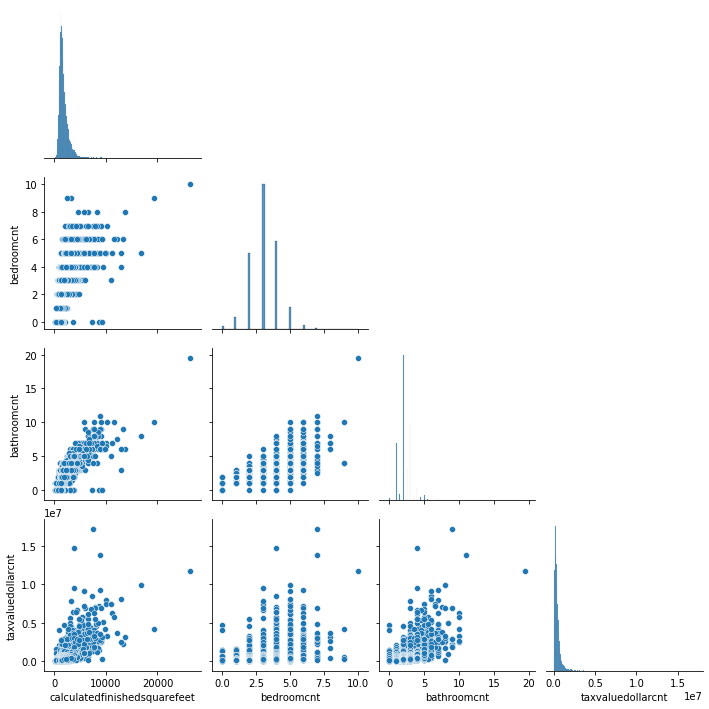

In [9]:
sns.pairplot(df, corner=True)

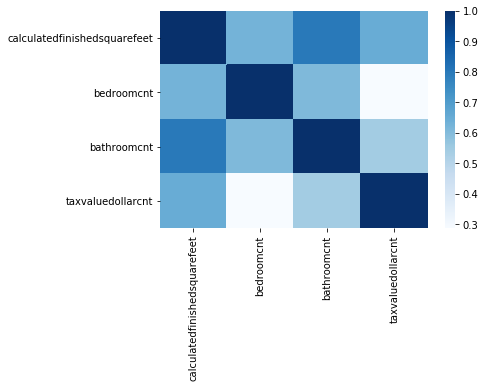

In [10]:
sns.heatmap(df.corr(),cmap="Blues")

In [11]:
df.columns = ['square_feet','bed_count','bath_count','tax_value']

In [12]:
df.columns

Index(['square_feet', 'bed_count', 'bath_count', 'tax_value'], dtype='object')

# Prepare

In [13]:
def train_validate_test(df):
    '''
    Takes a dataframe and splits into train, validate, test 
    into 70%, 20%, 10% respectively.
    '''

    # Import to use split function, can only split two at a time
    from sklearn.model_selection import train_test_split

    # Frist, split into train + validate together and test by itself
    # Test will be about %10 of the data, train + validate is %70 for now
    # Set random_state so we can reproduce the same 'random' data
    train_validate, test = train_test_split(df, test_size = .10, random_state = 123)

    # Second, we plit train + validate into their seperate variables
    # Train will be about %70 of the data, Validate will be about %20 of the data
    train, validate = train_test_split(train_validate, test_size = .20, random_state = 123)

    # These two print functions allow us to ensure the date is properly split
    # Will print the shape of each variable when running the function
    print("train shape: ", train.shape, ", validate shape: ", validate.shape, ", test shape: ", test.shape)

    # Will print the shape of eachvariable as a percentage of the total data set
    # Varialbe to hold the sum of all rows (total observations in the data)
    total = df.count()[0]
    print("\ntrain percent: ", round(((train.shape[0])/total),2) * 100, 
            ", validate percent: ", round(((validate.shape[0])/total),2) * 100, 
            ", test percent: ", round(((test.shape[0])/total),2) * 100)

    return train, validate, test

In [14]:
train, validate, test = train_validate_test(df)

train shape:  (13312, 4) , validate shape:  (3329, 4) , test shape:  (1849, 4)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [15]:
train.head()

,square_feet,bed_count,bath_count,tax_value
11548,1414.0,3.0,2.0,156164.0
4070,1541.0,2.0,3.0,245710.0
4206,1672.0,3.0,2.0,85486.0
13273,2555.0,4.0,3.0,587732.0
12135,1040.0,3.0,1.0,403858.0


## Renaming Columns

## Scaling data
- taxvaluedollarcnt has a much higher range than the other features, especially bath/bedroom counts
- we will fit the scaling object to the train df, then apply this to the validate and test
    - *Only* fit to the *train* data, so the other data is still unseen

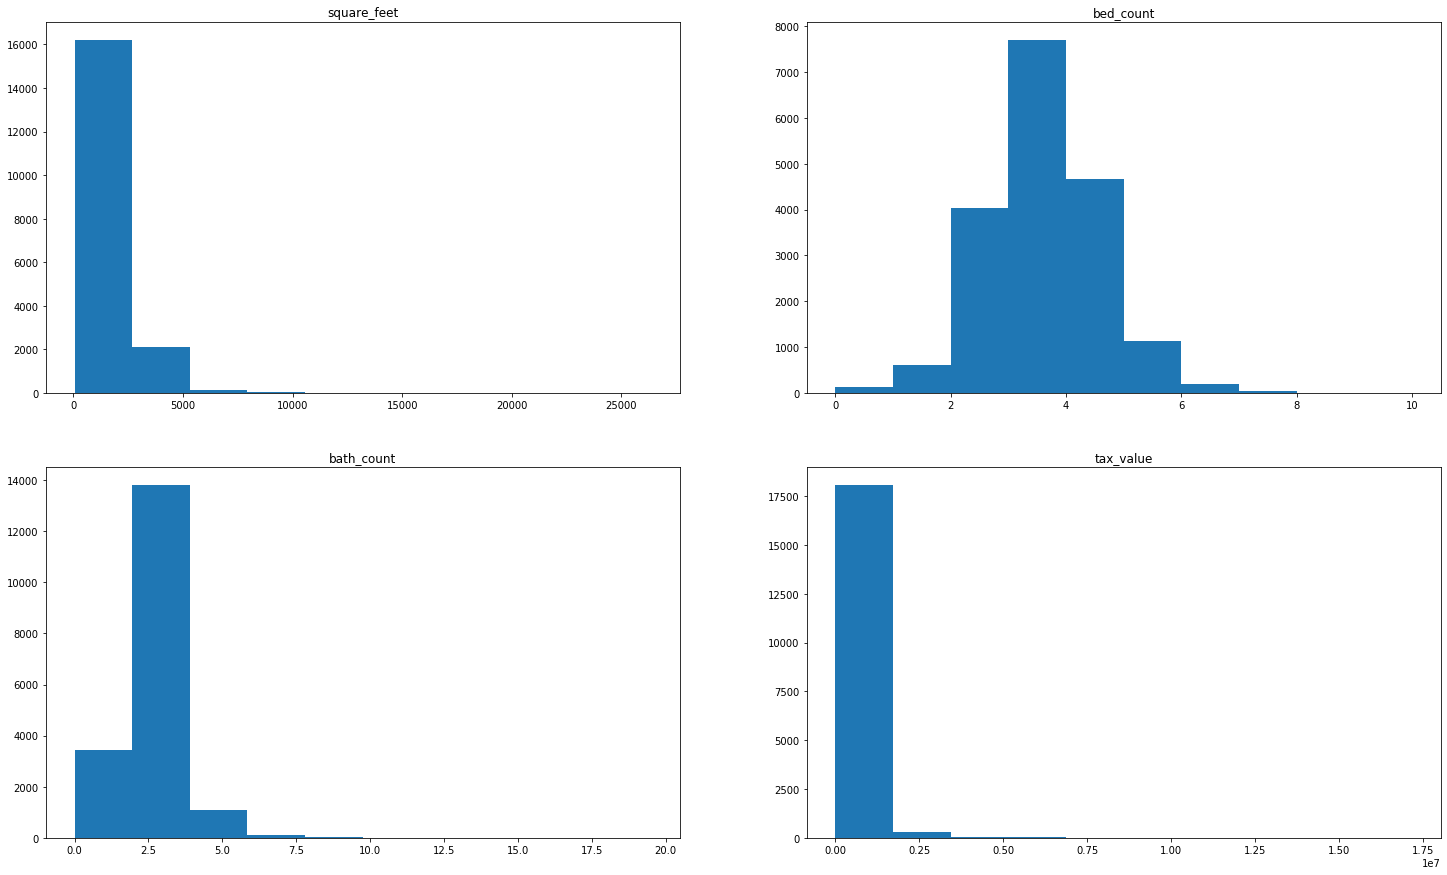

In [16]:
# Construct a figure with subplots of histograms of features

# sets size, can adjust to liking
plt.subplots(figsize=(25, 15))

plt.subplot(2,2,1);
line1 = plt.hist(df.square_feet)
plt.title('square_feet');

plt.subplot(2,2,2);
line2 = plt.hist(df.bed_count);
plt.title('bed_count');

plt.subplot(2,2,3);
line3 = plt.hist(df.bath_count);
plt.title('bath_count');

plt.subplot(2,2,4);
line3 = plt.hist(df.tax_value);
plt.title('tax_value');

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/anaco

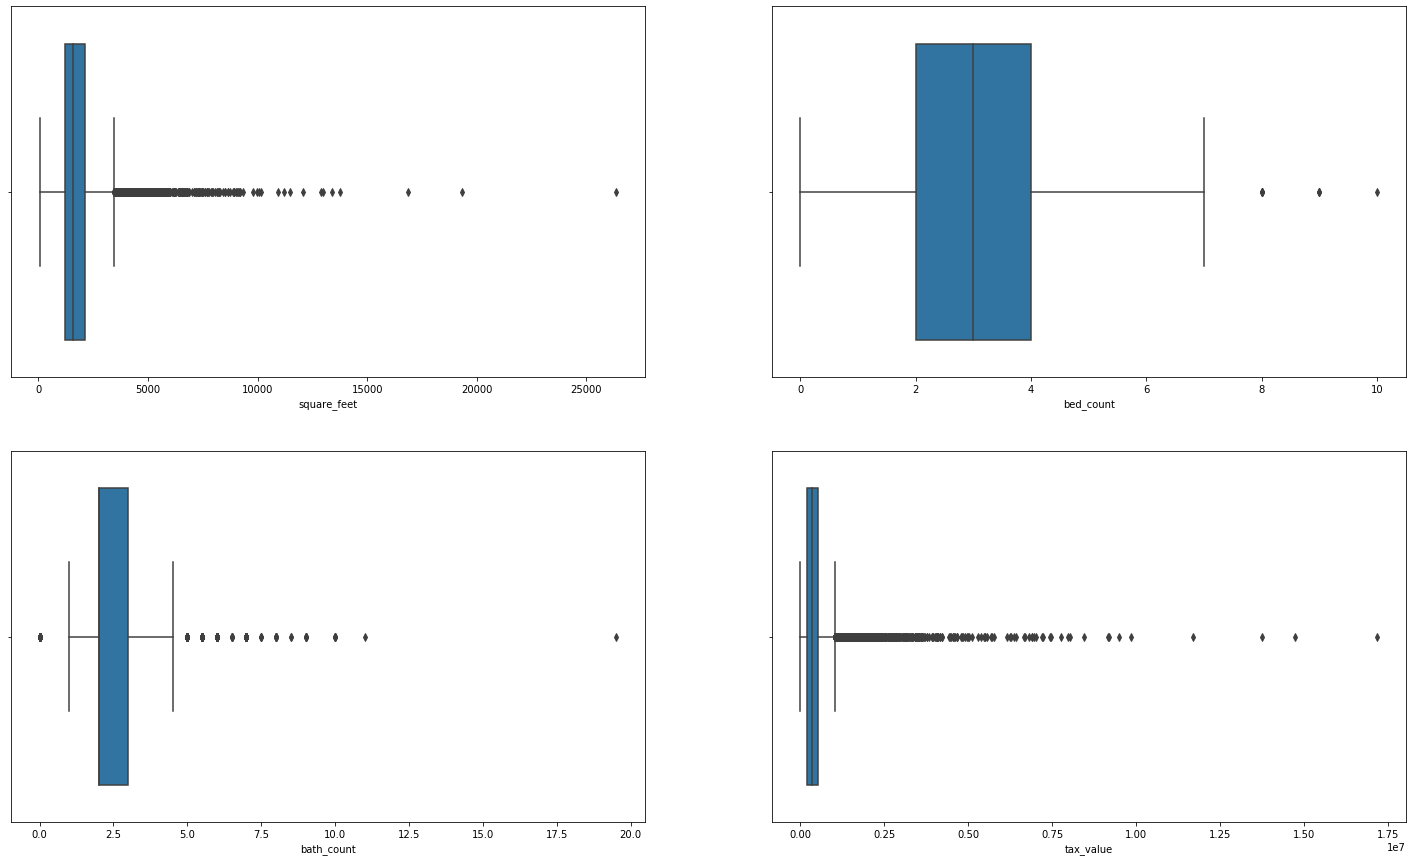

In [17]:
# Construct a figure with subplots of histograms of features

# sets size, can adjust to liking
plt.subplots(figsize=(25, 15))

plt.subplot(221)
sns.boxplot(df.square_feet)

plt.subplot(222)
sns.boxplot(df.bed_count)

plt.subplot(223)
sns.boxplot(df.bath_count)

plt.subplot(224)
sns.boxplot(df.tax_value)

## Takeaways
- Bedroom count is the only normally distributed feature
- Tax value is represented in scientific notation due to the large range
- Outliers are in square_feet, bath_count, and tax_value
- Need to remove outliers before scaling

## Remove Outliers

In [18]:
from scipy import stats

# Calculate z-score for each value in df
z = np.abs(stats.zscore(train))

#### The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

#### In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [19]:
print(z.max())

27.467826737211077


In [20]:
# outliers will be any value that is more than 3 standdard deviations from the average
threshold = 3
# print(np.where(z > 3))

In [21]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

square_feet       897.0
bed_count           2.0
bath_count          1.0
tax_value      334050.0
dtype: float64


In [22]:
train_o = train[(z < 3).all(axis=1)]

In [23]:
train_o.head()

,square_feet,bed_count,bath_count,tax_value
11548,1414.0,3.0,2.0,156164.0
4070,1541.0,2.0,3.0,245710.0
4206,1672.0,3.0,2.0,85486.0
13273,2555.0,4.0,3.0,587732.0
12135,1040.0,3.0,1.0,403858.0


# Scaling DF with Outliers Removed

In [24]:
# 1. Create the Scaling Object
scaler = sklearn.preprocessing.StandardScaler()

# 2. Fit to the train data only
scaler.fit(train.drop('tax_value', axis=1))

# 3. use the object on the whole df
# this returns an array, so we convert to df in the same line
train_scaled = pd.DataFrame(scaler.transform(train.drop('tax_value', axis=1)))
validate_scaled = pd.DataFrame(scaler.transform(validate.drop('tax_value', axis=1)))
test_scaled = pd.DataFrame(scaler.transform(test.drop('tax_value', axis=1)))

# the result of changing an array to a df resets the index and columns
# for each train, validate, and test, we change the index and columns back to original values

# Train
train_scaled.index = train.index
train_scaled.columns = ['bath_count_scaled','bed_count_scaled','square_feet_scaled']
train = pd.concat((train, train_scaled), axis=1)

# Validate
validate_scaled.index = validate.index
validate_scaled.columns = ['bath_count_scaled','bed_count_scaled','square_feet_scaled']
validate = pd.concat((validate, validate_scaled), axis=1)

# Test
test_scaled.index = test.index
test_scaled.columns = ['bath_count_scaled','bed_count_scaled','square_feet_scaled']
test = pd.concat((test, test_scaled), axis=1)

In [25]:
train

,square_feet,bed_count,bath_count,tax_value,bath_count_scaled,bed_count_scaled,square_feet_scaled
11548,1414.0,3.0,2.0,156164.0,-0.393602,-0.113343,-0.295933
4070,1541.0,2.0,3.0,245710.0,-0.260492,-1.096286,0.753889
4206,1672.0,3.0,2.0,85486.0,-0.123189,-0.113343,-0.295933
13273,2555.0,4.0,3.0,587732.0,0.802292,0.869601,0.753889
12135,1040.0,3.0,1.0,403858.0,-0.785595,-0.113343,-1.345755
...,...,...,...,...,...,...,...
2281,1470.0,2.0,3.0,956364.0,-0.334908,-1.096286,0.753889
10801,1288.0,2.0,1.0,402821.0,-0.525664,-1.096286,-1.345755
324,2547.0,3.0,2.5,2274016.0,0.793907,-0.113343,0.228978
17727,756.0,2.0,1.0,54834.0,-1.083258,-1.096286,-1.345755


Text(0.5, 1.0, 'Standard Scaled Square Feet')

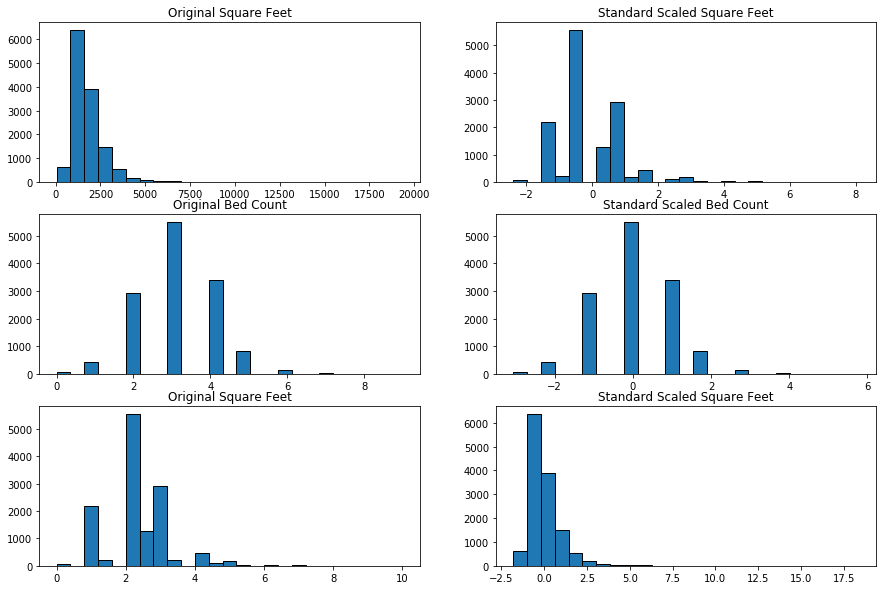

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(321)
plt.hist(train.square_feet, bins=25, ec='black')
plt.title('Original Square Feet')
plt.subplot(322)
plt.hist(train.square_feet_scaled, bins=25, ec='black')
plt.title('Standard Scaled Square Feet')

plt.subplot(323)
plt.hist(train.bed_count, bins=25, ec='black')
plt.title('Original Bed Count')
plt.subplot(324)
plt.hist(train.bed_count_scaled, bins=25, ec='black')
plt.title('Standard Scaled Bed Count')

plt.subplot(325)
plt.hist(train.bath_count, bins=25, ec='black')
plt.title('Original Square Feet')
plt.subplot(326)
plt.hist(train.bath_count_scaled, bins=25, ec='black')
plt.title('Standard Scaled Square Feet')